필요없는 피처 제거

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
from imblearn.under_sampling import RandomUnderSampler
from tqdm import tqdm
from sklearn.model_selection import train_test_split
plt.style.use("ggplot")
import lightgbm as lgbm


In [21]:
train_df = pd.read_csv('../Data/multi-label-classification-data/train_process.csv')
test_df = pd.read_csv('../Data/multi-label-classification-data/test.csv')
label_df = pd.read_csv('../Data/multi-label-classification-data/label.csv')
submission = pd.read_csv('../Data/multi-label-classification-data/sample_submission.csv')

In [22]:
# train_df = train_df.drop(['id','FpDensityMorgan1', 'FpDensityMorgan2','FpDensityMorgan3'], axis=1)
# test_df = test_df.drop(['id','FpDensityMorgan1', 'FpDensityMorgan2','FpDensityMorgan3'], axis=1)
train_df = train_df.drop(['id'], axis=1)
test_df = test_df.drop(['id'], axis=1)

In [23]:
# 훈련 검증 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(train_df, label_df,test_size=0.3)

In [24]:
cols = label_df.columns

In [25]:
# 하이퍼 파라미터
params={"num_leaves":300,
       "max_bin":450,
       "feature_fraction":0.52,
       "bagging_fraction":0.52,
       "objective":"binary",
       "learning_rate":0.05,
       "boosting_type":"gbdt",
       "metric":"auc"
       }

In [26]:
# 학습

models = []
for  i in tqdm(range(y_train.shape[1])):
    
    train = lgbm.Dataset(x_train, y_train.iloc[:,i])
    test = lgbm.Dataset(x_test, y_test.iloc[:,i])
    model = lgbm.train(params=params, train_set=train, valid_sets=[train, test], num_boost_round=1000, early_stopping_rounds=10, verbose_eval=100)
    model_name = model_name = "model02_"+cols[i]
    model.save_model(model_name)
    models.append(model)

  0%|          | 0/6 [00:00<?, ?it/s]

[LightGBM] [Warning] Starting from the 2.1.2 version, default value for the "boost_from_average" parameter in "binary" objective is true.
This may cause significantly different results comparing to the previous versions of LightGBM.
Try to set boost_from_average=false, if your old models produce bad results
[LightGBM] [Info] Number of positive: 6955, number of negative: 3431
[LightGBM] [Info] Total Bins 9515
[LightGBM] [Info] Number of data: 10386, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.669651 -> initscore=0.706609
[LightGBM] [Info] Start training from score 0.706609
Training until validation scores don't improve for 10 rounds


 33%|███▎      | 2/6 [00:00<00:00,  4.09it/s]

Early stopping, best iteration is:
[41]	training's auc: 0.985056	valid_1's auc: 0.702006
[LightGBM] [Warning] Starting from the 2.1.2 version, default value for the "boost_from_average" parameter in "binary" objective is true.
This may cause significantly different results comparing to the previous versions of LightGBM.
Try to set boost_from_average=false, if your old models produce bad results
[LightGBM] [Info] Number of positive: 8291, number of negative: 2095
[LightGBM] [Info] Total Bins 9515
[LightGBM] [Info] Number of data: 10386, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.798286 -> initscore=1.375617
[LightGBM] [Info] Start training from score 1.375617
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[17]	training's auc: 0.985104	valid_1's auc: 0.555308
[LightGBM] [Warning] Starting from the 2.1.2 version, default value for the "boost_from_average" parameter in "binary" objective is true.
This may c

 50%|█████     | 3/6 [00:00<00:00,  4.02it/s]

Early stopping, best iteration is:
[31]	training's auc: 0.983714	valid_1's auc: 0.637069
[LightGBM] [Warning] Starting from the 2.1.2 version, default value for the "boost_from_average" parameter in "binary" objective is true.
This may cause significantly different results comparing to the previous versions of LightGBM.
Try to set boost_from_average=false, if your old models produce bad results
[LightGBM] [Info] Number of positive: 2935, number of negative: 7451
[LightGBM] [Info] Total Bins 9515
[LightGBM] [Info] Number of data: 10386, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.282592 -> initscore=-0.931641
[LightGBM] [Info] Start training from score -0.931641
Training until validation scores don't improve for 10 rounds


 67%|██████▋   | 4/6 [00:01<00:00,  3.96it/s]

Early stopping, best iteration is:
[32]	training's auc: 0.98239	valid_1's auc: 0.675043
[LightGBM] [Warning] Starting from the 2.1.2 version, default value for the "boost_from_average" parameter in "binary" objective is true.
This may cause significantly different results comparing to the previous versions of LightGBM.
Try to set boost_from_average=false, if your old models produce bad results
[LightGBM] [Info] Number of positive: 1523, number of negative: 8863
[LightGBM] [Info] Total Bins 9515
[LightGBM] [Info] Number of data: 10386, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.146640 -> initscore=-1.761203
[LightGBM] [Info] Start training from score -1.761203
Training until validation scores don't improve for 10 rounds


100%|██████████| 6/6 [00:01<00:00,  4.03it/s]

Early stopping, best iteration is:
[34]	training's auc: 0.996969	valid_1's auc: 0.681297
[LightGBM] [Warning] Starting from the 2.1.2 version, default value for the "boost_from_average" parameter in "binary" objective is true.
This may cause significantly different results comparing to the previous versions of LightGBM.
Try to set boost_from_average=false, if your old models produce bad results
[LightGBM] [Info] Number of positive: 1548, number of negative: 8838
[LightGBM] [Info] Total Bins 9515
[LightGBM] [Info] Number of data: 10386, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.149047 -> initscore=-1.742097
[LightGBM] [Info] Start training from score -1.742097
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[19]	training's auc: 0.993448	valid_1's auc: 0.556646


In [27]:
submission

,id,EC1,EC2
0,14838,0.5,0.5
1,14839,0.5,0.5
2,14840,0.5,0.5
3,14841,0.5,0.5
4,14842,0.5,0.5
...,...,...,...
9888,24726,0.5,0.5
9889,24727,0.5,0.5
9890,24728,0.5,0.5
9891,24729,0.5,0.5


In [31]:
submission = submission[['id']]

ec1 = pd.DataFrame(models[0].predict(test_df), columns=['EC1'])
ec2 = pd.DataFrame(models[1].predict(test_df), columns=['EC2'])
# submission = pd.concat([submission, ec1, ec2], axis=1)
# submission.to_csv('submit_02.csv', index=False)

[Text(0.5, 1.0, 'Feature Importance (gain)'),
 Text(0.5, 0, 'Feature Importance'),
 Text(0, 0.5, 'Features')]

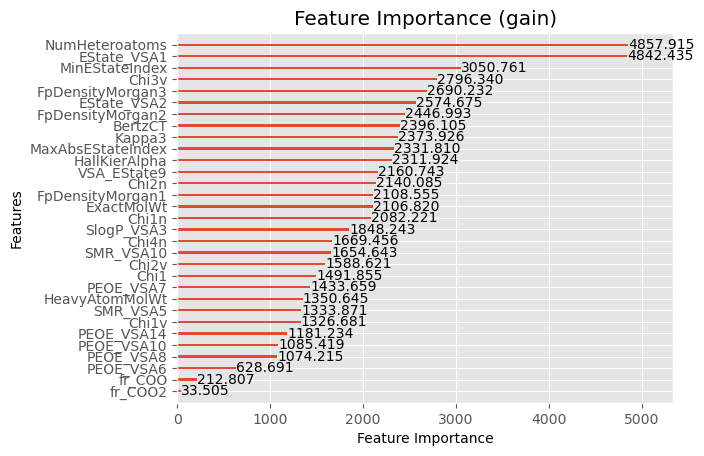

In [34]:
ax = lgbm.plot_importance(models[0], max_num_features=len(train_df.columns), importance_type='gain')
ax.set(title=f'Feature Importance (gain)',
	xlabel='Feature Importance',
	ylabel='Features')

[Text(0.5, 1.0, 'Feature Importance (split)'),
 Text(0.5, 0, 'Feature Importance'),
 Text(0, 0.5, 'Features')]

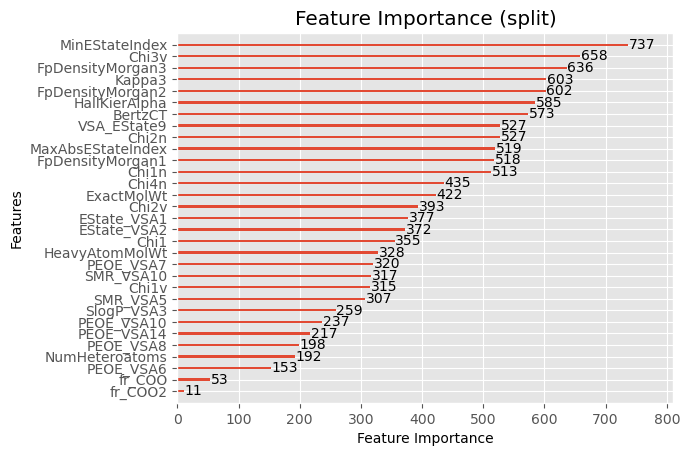

In [29]:
ax = lgbm.plot_importance(models[0], max_num_features=len(train_df.columns), importance_type='split')
ax.set(title=f'Feature Importance (split)',
	xlabel='Feature Importance',
	ylabel='Features')

[Text(0.5, 1.0, 'Feature Importance (gain)'),
 Text(0.5, 0, 'Feature Importance'),
 Text(0, 0.5, 'Features')]

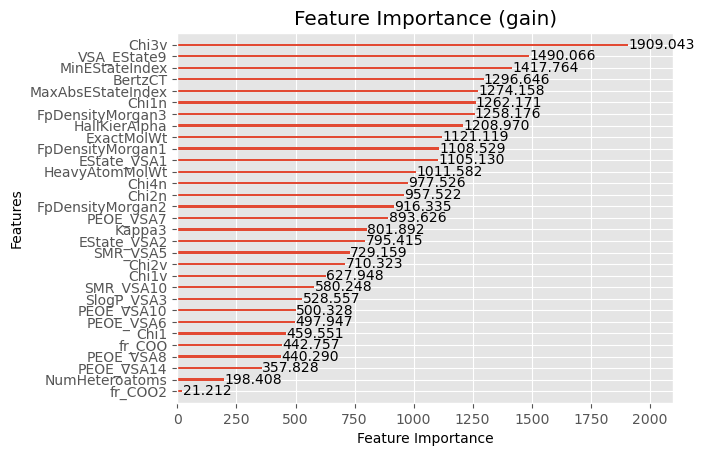

In [35]:
ax = lgbm.plot_importance(models[1], max_num_features=len(train_df.columns), importance_type='gain')
ax.set(title=f'Feature Importance (gain)',
	xlabel='Feature Importance',
	ylabel='Features')

[Text(0.5, 1.0, 'Feature Importance (split)'),
 Text(0.5, 0, 'Feature Importance'),
 Text(0, 0.5, 'Features')]

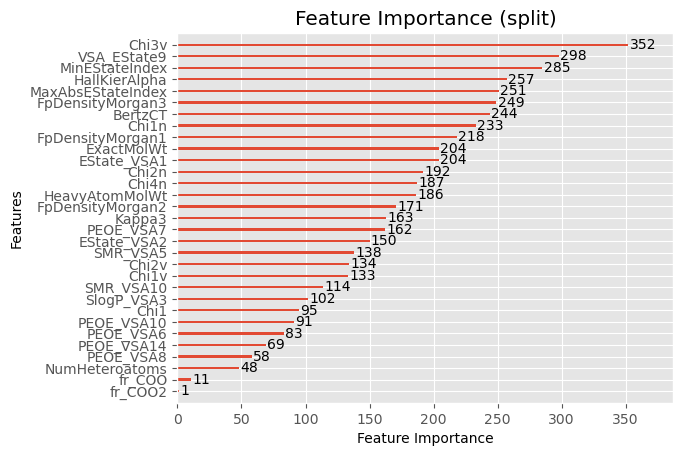

In [30]:
ax = lgbm.plot_importance(models[1], max_num_features=len(train_df.columns), importance_type='split')
ax.set(title=f'Feature Importance (split)',
	xlabel='Feature Importance',
	ylabel='Features')